In [1]:
import torch
import numpy as np
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from evaluation_based_sampling import evaluate, evaluate_program
from daphne import daphne

# Problem 5

In [3]:
from load_helper import ast_helper, graph_helper

In [4]:
fname = '5_abc.daphne' 
ast = ast_helper(fname)
ast

[['let',
  ['x', ['sample', ['normal', 0, 10]]],
  ['let',
   ['y', ['sample', ['normal', 0, 10]]],
   ['let',
    ['dontcare0', ['observe', ['normal', ['+', 'x', 'y'], 3], 7]],
    ['vector', 'x', 'y']]]]]

In [5]:
import parse
import importance_sampling

In [8]:
%%time
num_samples=1000
samples,sigmas = parse.take_samples(num_samples,ast=ast)
samples

CPU times: user 346 ms, sys: 5.62 ms, total: 352 ms
Wall time: 348 ms


[tensor([-1.1825, 15.0536]),
 tensor([ 14.3323, -12.9572]),
 tensor([-7.2156, -9.5102]),
 tensor([-1.7570, -6.1374]),
 tensor([-2.7327, 16.4890]),
 tensor([ 1.9092, -7.2167]),
 tensor([ 1.8409, -3.8109]),
 tensor([-4.9682, -7.4966]),
 tensor([-16.2488,  -0.9600]),
 tensor([-4.2488,  7.2129]),
 tensor([ 27.8067, -10.7406]),
 tensor([8.1897, 9.5476]),
 tensor([3.6113, 9.3947]),
 tensor([-12.9941,   4.3929]),
 tensor([21.2037,  4.0612]),
 tensor([9.8141, 4.1588]),
 tensor([ 4.9108, 24.5647]),
 tensor([-6.8783, -6.8464]),
 tensor([ 1.7227, 21.1561]),
 tensor([12.2491,  5.5728]),
 tensor([ 11.1787, -19.9056]),
 tensor([-0.8705, -6.0734]),
 tensor([-1.7396, -2.3302]),
 tensor([ 6.1076, 10.9194]),
 tensor([ 18.4297, -13.5037]),
 tensor([ -7.2599, -14.2564]),
 tensor([3.0114, 2.8623]),
 tensor([-5.7192, 19.4799]),
 tensor([ 7.6933, 12.4405]),
 tensor([10.5855,  5.4348]),
 tensor([-20.6959, -10.8096]),
 tensor([-5.4187, -7.7330]),
 tensor([ -1.4145, -13.0345]),
 tensor([12.3315,  4.7803]),
 ten

In [10]:
samples = np.array([sample.tolist() for sample in samples])

In [14]:
samples.shape, probs.shape

((1000, 2), (1000, 1))

In [11]:
posterior_mean, probs = importance_sampling.weighted_average(samples,sigmas,reshape_probs=(-1,1),axis=0)
posterior_mean

array([3.72391436, 2.87449431])

Text(0.5, 0, 'slope')

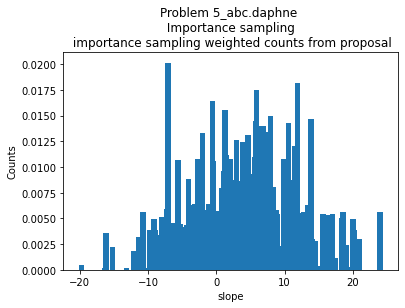

In [16]:
counts_bins = np.histogram(samples[:,0], weights=probs[:,0], bins=500)
counts, bins = counts_bins[0], counts_bins[1]
idx = (counts > counts.max()*0.005)
plt.bar(bins[1:][idx],counts[idx])
plt.title('Problem {} \n Importance sampling \n importance sampling weighted counts from proposal'.format(fname))
plt.ylabel('Counts')
plt.xlabel('x')

Text(0.5, 0, 'y')

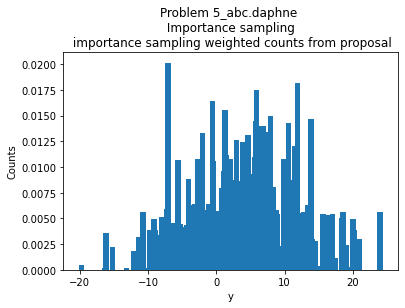

In [17]:
counts_bins = np.histogram(samples[:,0], weights=probs[:,0], bins=500)
counts, bins = counts_bins[0], counts_bins[1]
idx = (counts > counts.max()*0.005)
plt.bar(bins[1:][idx],counts[idx])
plt.title('Problem {} \n Importance sampling \n importance sampling weighted counts from proposal'.format(fname))
plt.ylabel('Counts')
plt.xlabel('y')

In [18]:
expectation_samples_2, probs = importance_sampling.weighted_average(samples**2,sigmas,reshape_probs=(-1,1),axis=0) 
posterior_variance = expectation_samples_2 - posterior_mean**2
posterior_variance

array([50.08658518, 48.06374494])

In [ ]:
expectation_samplex_sampley, probs = importance_sampling.weighted_average(samples[:,0]*samples[:,1],sigmas) 
covariance = expectation_samplex_sampley - posterior_mean[0]*posterior_mean[1]
covariance